## <code style="color:steelblue">Student Name: Zheyuan Dong</code>

#### COMPANION WORKBOOK

# Exploratory Analysis

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

In [19]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')


## I. Basic Information

In [8]:
df = pd.read_csv('real_estate_data.csv')

# 1.1 shape
print(df.shape)

# 1.2 column types
print(df.dtypes)

# 

(1883, 26)
tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object


In [12]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [17]:
# Dive into lot size, since there are some 0s
df.lot_size.describe()

count      1883.000000
mean      13392.620287
std       44949.303601
min           0.000000
25%        1542.000000
50%        6098.000000
75%       11761.000000
max     1220551.000000
Name: lot_size, dtype: float64

## II. Distributions

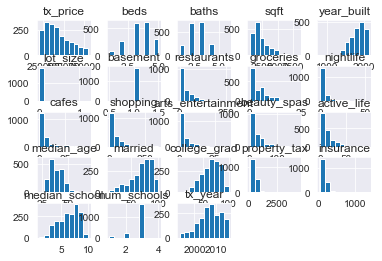

In [20]:
df.hist()  # This is ugly --- all graphs are stack together 
plt.show()  

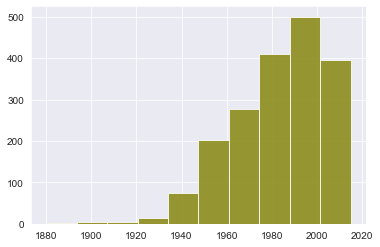

count   1883.000000
mean    1982.963887
std       20.295945
min     1880.000000
25%     1970.000000
50%     1986.000000
75%     2000.000000
max     2015.000000
Name: year_built, dtype: float64

In [25]:
# Explot year built 
df.year_built.hist(color = 'olive', alpha=0.8)
plt.show() 

df.year_built.describe()

In [27]:
# Show descriptives only for object types
df.describe(include= ['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


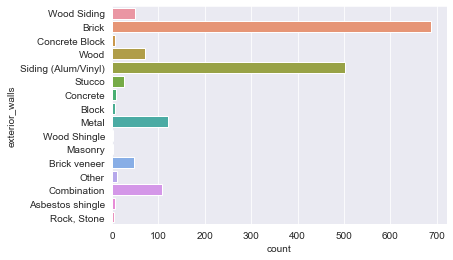

In [28]:
# Visualize the distribution of an object column
sns.countplot(y= 'exterior_walls', data= df)
plt.show()

## III. Segmentations

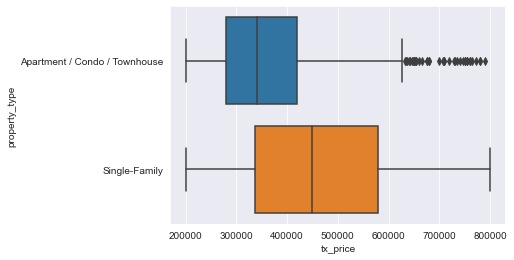

In [29]:
# Plot price by property type
sns.boxplot(y= 'property_type', x='tx_price', data=df)
plt.show()

In [32]:
# Compare multiple features between property types
df.groupby('property_type').mean()[['tx_price', 'beds', 'baths']]

,tx_price,beds,baths
property_type,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498
Single-Family,464644.711111,4.029630,2.862037


## IV. Correlations

In [34]:
# Browse all correlations into a dataframe
correlations = df.corr()
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,nan,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,nan,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,nan,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,nan,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,nan,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,nan,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,nan,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,nan,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,nan,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


<AxesSubplot:>

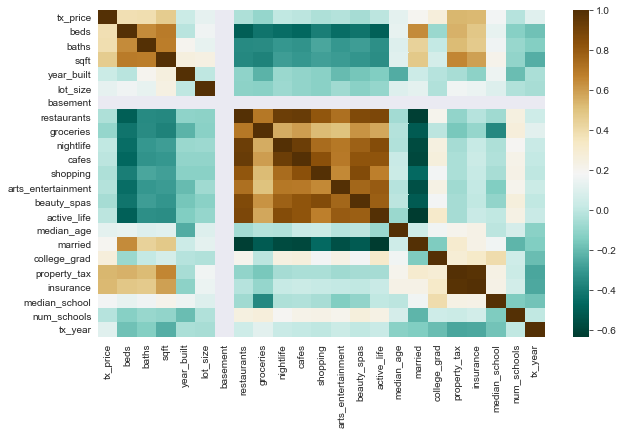

In [46]:
# Visualize the correlations using a heat map

# Increase figure size
plt.figure(figsize = (10, 6))

# Plot the heatmap
sns.heatmap(correlations, cmap= 'BrBG_r')

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 1.1 - Back to Basics</span>

Before moving on, let's dig a bit deeper into some of the exploratory analysis basics. Getting some extra practice right now will set you up for smoother success as you continue through the project.

#### A.) First, try to filter <code style="color:steelblue">df.dtypes</code> to only categorical variables.
* **Tip:** Remember our boolean masks from Python for Data Science?
* **Tip:** A Series can be filtered by boolean masks the same way that a DataFrame can be.

In [51]:
df.dtypes[df.dtypes== 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type     object
exterior_walls    object
roof              object
dtype: object
</pre>

#### B.) Iterate through the categorical feature names and print each name.
* By the way, to actually get the **feature names** that you can iterate through, you have to access the <code style="color:steelblue">.index</code> attribute.
* **Tip:** Filter as you did in part (A), and then call the <code style="color:steelblue">.index</code> attribute.

In [54]:
for i in df.dtypes[df.dtypes== 'object'].index:
    print(i)

property_type
exterior_walls
roof


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type
exterior_walls
roof
</pre>

As you'll see later, the ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful.

#### C.) Next, look at a few more examples by displaying the first 10 rows of data, instead of just the first 5.
* **Tip:** <code style="color:steelblue">df.head()</code> returns the first 5 rows by default, but you can pass in an integer argument for the number of rows you want.

In [55]:
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,nan,107,9,30,19,89,6,47,58,33.000000,65.000000,84.000000,234.000000,81.000000,9.000000,3.000000,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.000000,105,15,6,13,87,2,26,14,39.000000,73.000000,69.000000,169.000000,51.000000,3.000000,3.000000,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,nan,183,13,31,30,101,10,74,62,28.000000,15.000000,86.000000,216.000000,74.000000,8.000000,3.000000,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,nan,198,9,38,25,127,11,72,83,36.000000,25.000000,91.000000,265.000000,92.000000,9.000000,3.000000,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,nan,149,7,22,20,83,10,50,73,37.000000,20.000000,75.000000,88.000000,30.000000,9.000000,3.000000,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,nan,146,10,23,27,86,9,60,52,28.000000,15.000000,86.000000,168.000000,58.000000,8.000000,3.000000,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,nan,159,13,36,17,92,12,66,50,28.000000,36.000000,88.000000,176.000000,61.000000,7.000000,3.000000,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,nan,198,9,38,25,127,11,72,83,36.000000,25.000000,91.000000,266.000000,92.000000,9.000000,3.000000,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,nan,51,8,6,2,40,18,32,41,36.000000,49.000000,77.000000,188.000000,65.000000,6.000000,3.000000,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,nan,119,10,26,25,183,13,70,36,57.000000,13.000000,83.000000,147.000000,51.000000,6.000000,3.000000,2007


Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

#### D.) Display the last 5 rows of data.
* **Hint:** You've seen the "head," but what about the "tail?"

In [56]:
df.tail(5)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.000000,0,0,0,0,3,0,0,1,46.000000,76.000000,87.000000,1250.000000,381.000000,10.000000,3.000000,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.000000,45,7,5,7,41,3,61,11,42.000000,73.000000,61.000000,1553.000000,473.000000,9.000000,3.000000,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.000000,5,1,1,1,8,2,1,2,43.000000,87.000000,66.000000,942.000000,287.000000,8.000000,1.000000,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.000000,18,2,4,0,5,1,8,6,43.000000,61.000000,51.000000,803.000000,245.000000,5.000000,2.000000,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.000000,0,0,0,1,2,2,0,5,37.000000,80.000000,86.000000,1459.000000,444.000000,9.000000,3.000000,2015


## <span style="color:RoyalBlue">Exercise 1.2 - Back to Distributions</span>
You don't need to memorize a whole bunch of data visualization syntax in order to be successful in data science and machine learning. However, there are a few key techniques you'll need to know, including:
* How to increase the figure size to give each sub-chart more space.
* How to rotate axis labels to make them more legible.
* How to arrive at a decent chart with the help of documentation and some **trial-and-error.**

In this exercise, let's make the histogram grid plot from the Coding Section much more legible.

#### A.) First, recreate the histogram grid from the coding section.
* Think about: how might you improve this plot to make it more legible and useful?

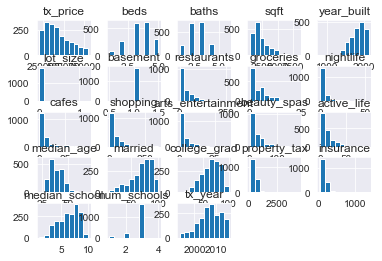

In [58]:
df.hist()
plt.show()

#### B.) Plot the same histogram grid as above, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.
* **Tip:** Try making the figure size 14 x 14. 
* **Tip:** The <code style="color:steelblue">figsize=</code> argument takes a **tuple** for figure size.
* **Tip:** The <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.
* The <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html" target="_blank">official documentation page</a> is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* It's ok to arrive at the answer through **trial and error** (this is often easier than memorizing the various arguments).

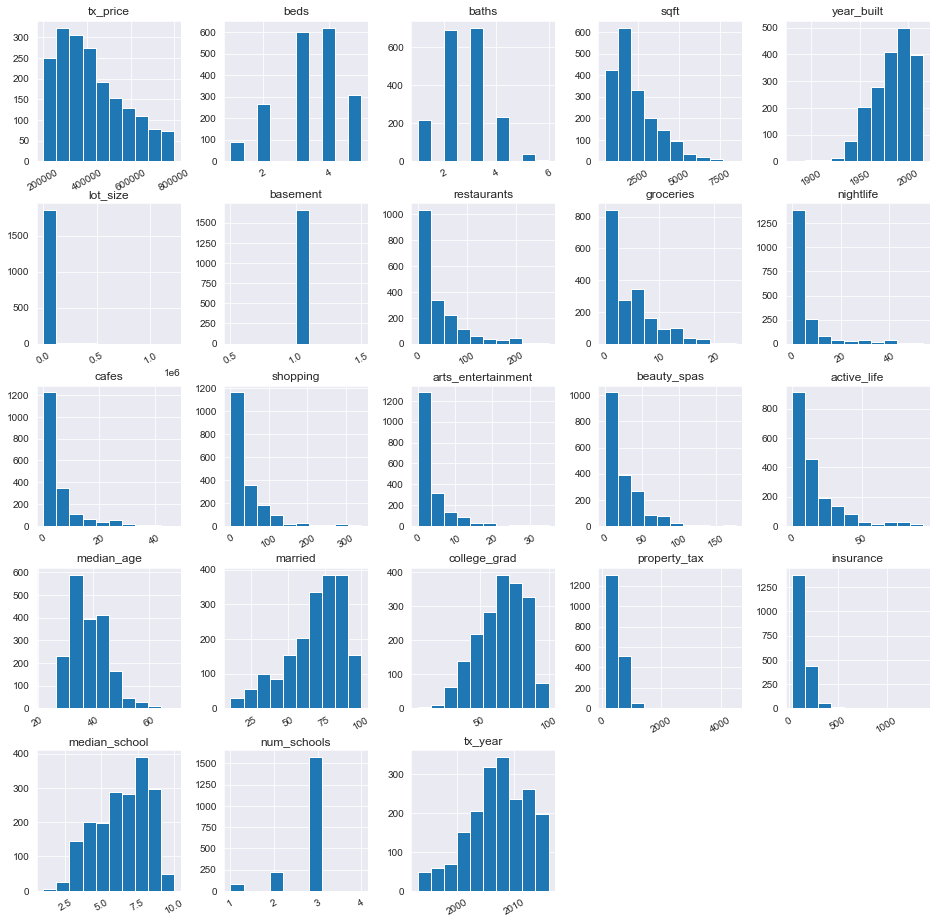

In [64]:
df.hist(xrot = 30, figsize=(16, 16))
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="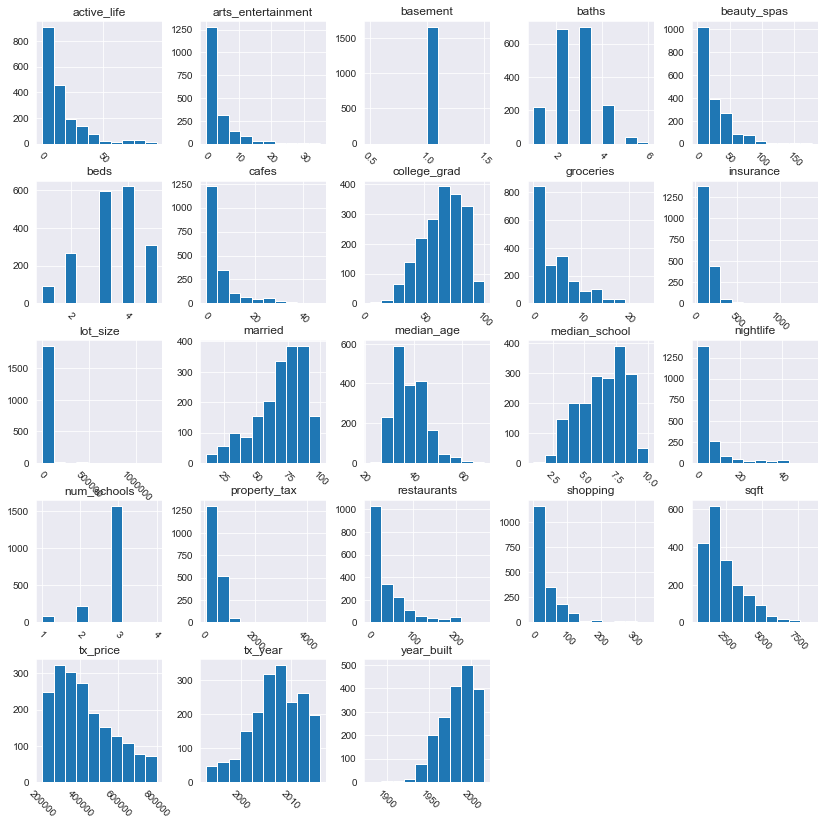&#10;">

#### C.) Next, display summary statistics for the numerical features again. Then, answer the following questions:
1. In our dataset, what is the earliest transaction year (**tx_year**)?
2. Among all properties in our dataset, what is the maximum number of bedrooms (**beds**)?
3. In our dataset, do we see more variance in the number of bedrooms (**beds**) or the number of bathrooms (**baths**)?
4. Half of all properties in the dataset have a total floor size between 1345 **sqft** and which other value?

In [65]:
df.describe()[['tx_year', 'beds', 'baths', 'sqft']]

,tx_year,beds,baths,sqft
count,1883.000000,1883.000000,1883.000000,1883.000000
mean,2007.111524,3.420605,2.579926,2329.398832
std,5.196898,1.068554,0.945576,1336.991858
min,1993.000000,1.000000,1.000000,500.000000
25%,2004.000000,3.000000,2.000000,1345.000000
50%,2007.000000,3.000000,3.000000,1907.000000
75%,2011.000000,4.000000,3.000000,3005.000000
max,2016.000000,5.000000,6.000000,8450.000000


Finally, in the Coding Section, we only displayed the bar plot for one of the categorical features, **exterior_walls**. Let's do the same for the other features and check for sparse classes.

#### D.) Write a <code style="color:steelblue">for</code> loop (that can handle any number of categorical features) to plot bar plots of each of the categorical features.
* **Tip:** Borrow from your answer to **part (A) of Exercise 1.1**.
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all 3 plots in one output.
* Which features suffer from sparse classes?

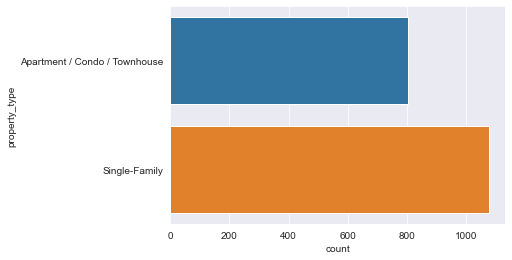

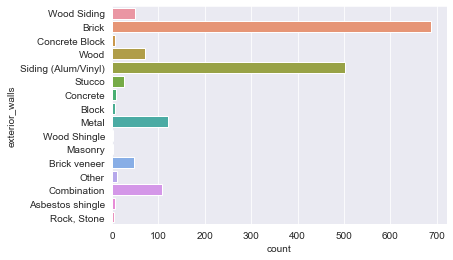

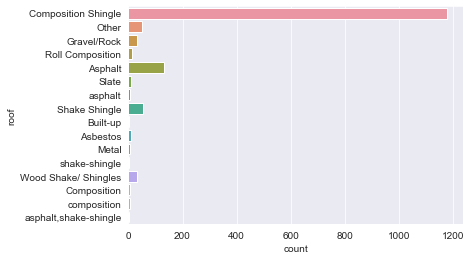

In [74]:
categoricals = df.dtypes[df.dtypes== 'object'].index
for i in categoricals:
    sns.countplot(y= i, data = df)
    plt.show()

## <span style="color:RoyalBlue">Exercise 1.3 - Back to Segmentations</span>

As we saw in the Coding Section, on average, single family homes are more expensive. How else do the different property types differ? Let's see:

#### A.) First, segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.

<AxesSubplot:xlabel='sqft', ylabel='property_type'>

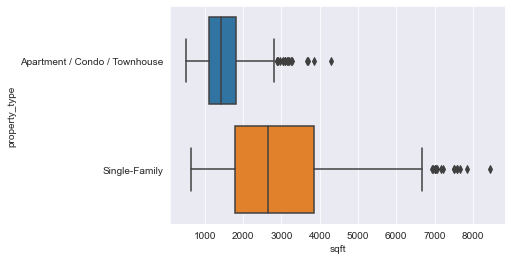

In [75]:
sns.boxplot(y='property_type', x= 'sqft', data= df)

#### B.) After producing the plot, answer these questions:
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

#### C.) Next, display the standard deviations of each feature alongside their means.
* This will give you a better idea of the variation within in feature, by class.
* **Tip:** Pass a list of metrics into the <code style="color:steelblue">.agg()</code> function, after performing your groupby.
* Check out the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once" target="_blank">documentation</a> for more help.

In [76]:
df.groupby('property_type').agg(['mean', 'std'])

tx_price                   beds           \
                                       mean           std     mean      std   
property_type                                                                 
Apartment / Condo / Townhouse 366614.034869 121784.490486 2.601494 0.810220   
Single-Family                 464644.711111 157758.739013 4.029630 0.795639   

                                 baths                 sqft              \
                                  mean      std        mean         std   
property_type                                                             
Apartment / Condo / Townhouse 2.200498 0.815009 1513.727273  556.286650   
Single-Family                 2.862037 0.937551 2935.865741 1422.871169   

                               year_built               lot_size               \
                                     mean       std         mean          std   
property_type                                                                   
Apartment / Condo / Townhouse 1988.936488 15.513640  3944.239103 44284.168767   
Single-Family                 1978.523148 22.210582 20417.666667 44165.529302   

                              basement          restaurants            \
                                  mean      std        mean       std   
property_type                                                           
Apartment / Condo / Townhouse 1.000000 0.000000   58.418431 54.343594   
Single-Family                 1.000000 0.000000   26.672222 34.726416   

                              groceries          nightlife              cafes  \
                                   mean      std      mean       std     mean   
property_type                                                                   
Apartment / Condo / Townhouse  5.919054 4.645774  7.855542 10.643816 8.037360   
Single-Family                  3.453704 4.067285  3.007407  5.543822 3.308333   

                                        shopping           arts_entertainment  \
                                   std      mean       std               mean   
property_type                                                                   
Apartment / Condo / Townhouse 9.077038 57.631382 61.852299           4.840598   
Single-Family                 5.325053 28.289815 42.292313           2.318519   

                                       beauty_spas           active_life  \
                                   std        mean       std        mean   
property_type                                                              
Apartment / Condo / Townhouse 5.234834   32.087173 26.910443   22.410959   
Single-Family                 3.929691   16.970370 22.872112   10.946296   

                                        median_age            married  \
                                    std       mean      std      mean   
property_type                                                           
Apartment / Condo / Townhouse 21.058178  37.199253 6.906584 57.534247   
Single-Family                 12.599296  39.643519 6.225732 77.685185   

                                        college_grad           property_tax  \
                                    std         mean       std         mean   
property_type                                                                 
Apartment / Condo / Townhouse 20.372706    66.372354 17.095874   346.261519   
Single-Family                 13.868205    64.128704 16.790347   556.383333   

                                          insurance           median_school  \
                                     std       mean       std          mean   
property_type                                                                 
Apartment / Condo / Townhouse 142.292282 105.652553 47.118015      6.382316   
Single-Family                 244.351559 166.329630 77.816022      6.592593   

                                       num_schools              tx_year  \
                                   std        mean      std      

<strong style="color:RoyalBlue">Expected output:</strong>


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">tx_price</th>
      <th colspan="2" halign="left">beds</th>
      <th colspan="2" halign="left">baths</th>
      <th colspan="2" halign="left">sqft</th>
      <th colspan="2" halign="left">year_built</th>
      <th colspan="2" halign="left">lot_size</th>
      <th colspan="2" halign="left">basement</th>
      <th colspan="2" halign="left">restaurants</th>
      <th colspan="2" halign="left">groceries</th>
      <th colspan="2" halign="left">nightlife</th>
      <th colspan="2" halign="left">cafes</th>
      <th colspan="2" halign="left">shopping</th>
      <th colspan="2" halign="left">arts_entertainment</th>
      <th colspan="2" halign="left">beauty_spas</th>
      <th colspan="2" halign="left">active_life</th>
      <th colspan="2" halign="left">median_age</th>
      <th colspan="2" halign="left">married</th>
      <th colspan="2" halign="left">college_grad</th>
      <th colspan="2" halign="left">property_tax</th>
      <th colspan="2" halign="left">insurance</th>
      <th colspan="2" halign="left">median_school</th>
      <th colspan="2" halign="left">num_schools</th>
      <th colspan="2" halign="left">tx_year</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>property_type</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Apartment / Condo / Townhouse</th>
      <td>366614.034869</td>
      <td>121784.490486</td>
      <td>2.601494</td>
      <td>0.810220</td>
      <td>2.200498</td>
      <td>0.815009</td>
      <td>1513.727273</td>
      <td>556.286650</td>
      <td>1988.936488</td>
      <td>15.513640</td>
      <td>3944.239103</td>
      <td>44284.168767</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>58.418431</td>
      <td>54.343594</td>
      <td>5.919054</td>
      <td>4.645774</td>
      <td>7.855542</td>
      <td>10.643816</td>
      <td>8.037360</td>
      <td>9.077038</td>
      <td>57.631382</td>
      <td>61.852299</td>
      <td>4.840598</td>
      <td>5.234834</td>
      <td>32.087173</td>
      <td>26.910443</td>
      <td>22.410959</td>
      <td>21.058178</td>
      <td>37.199253</td>
      <td>6.906584</td>
      <td>57.534247</td>
      <td>20.372706</td>
      <td>66.372354</td>
      <td>17.095874</td>
      <td>346.261519</td>
      <td>142.292282</td>
      <td>105.652553</td>
      <td>47.118015</td>
      <td>6.382316</td>
      <td>1.941998</td>
      <td>2.831880</td>
      <td>0.455370</td>
      <td>2007.941469</td>
      <td>4.099487</td>
    </tr>
    <tr>
      <th>Single-Family</th>
      <td>464644.711111</td>
      <td>157758.739013</td>
      <td>4.029630</td>
      <td>0.795639</td>
      <td>2.862037</td>
      <td>0.937551</td>
      <td>2935.865741</td>
      <td>1422.871169</td>
      <td>1978.523148</td>
      <td>22.210582</td>
      <td>20417.666667</td>
      <td>44165.529302</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>26.672222</td>
      <td>34.726416</td>
      <td>3.453704</td>
      <td>4.067285</td>
      <td>3.007407</td>
      <td>5.543822</td>
      <td>3.308333</td>
      <td>5.325053</td>
      <td>28.289815</td>
      <td>42.292313</td>
      <td>2.318519</td>
      <td>3.929691</td>
      <td>16.970370</td>
      <td>22.872112</td>
      <td>10.946296</td>
      <td>12.599296</td>
      <td>39.643519</td>
      <td>6.225732</td>
      <td>77.685185</td>
      <td>13.868205</td>
      <td>64.128704</td>
      <td>16.790347</td>
      <td>556.383333</td>
      <td>244.351559</td>
      <td>166.329630</td>
      <td>77.816022</td>
      <td>6.592593</td>
      <td>2.031663</td>
      <td>2.764815</td>
      <td>0.537959</td>
      <td>2006.494444</td>
      <td>5.807059</td>
    </tr>
  </tbody>
</table>

## <span style="color:RoyalBlue">Exercise 1.5 - Back to Correlations</span>

#### A.) Before we begin, re-create the <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code> and visualize the correlation grid with a basic heatmap (same as in the coding section).
* Remember to set the proper **cmap** argument.

<AxesSubplot:>

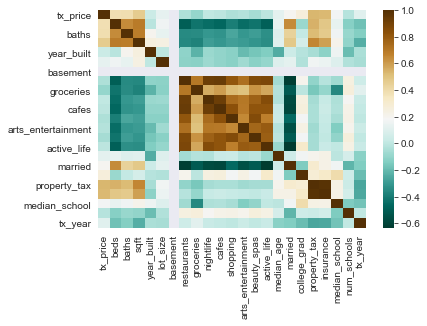

In [79]:
corrs = df.corr()
sns.heatmap(corrs, cmap= 'BrBG_r')

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="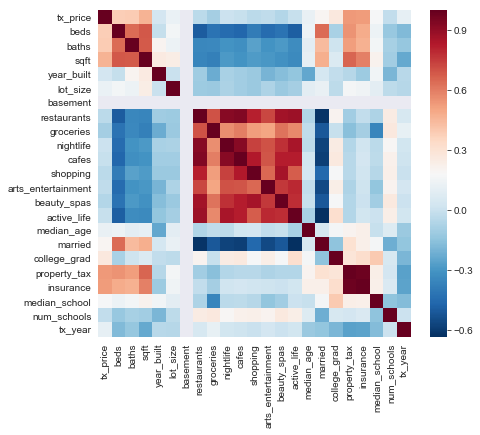&#10;">

#### Next, when plotting a heatmap of correlations, it's often helpful to do four things:
1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual clutter)
4. Drop the legend (colorbar on the side)

#### B.) First, change the background to white.
* Seaborn has several different **themes**. The default theme we use is called <code style="color:crimson">'darkgrid'</code>.
* You can change the theme with <code style="color:steelblue">sns.set_style()</code>.
* You only need to run this once, and the theme will persist until you change it again.
* Change the theme to <code style="color:crimson">'white'</code>
* Also, make the figure size 10 x 8 so that the plot is a bit larger.

<AxesSubplot:>

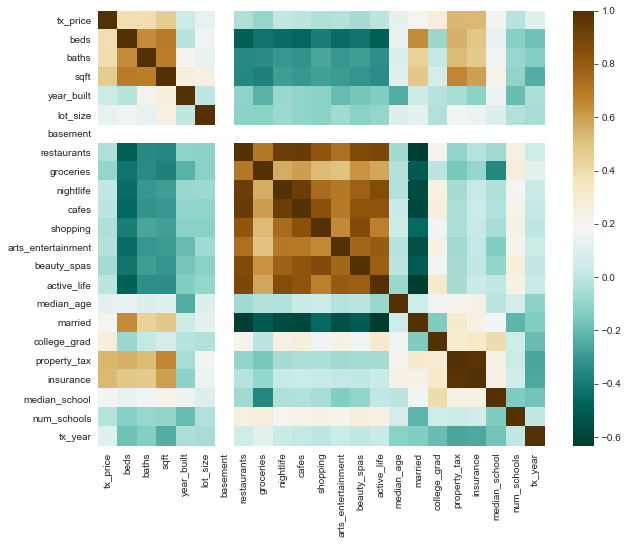

In [80]:
# Change color scheme
sns.set_style('white')

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(corrs, cmap= 'BrBG_r')

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="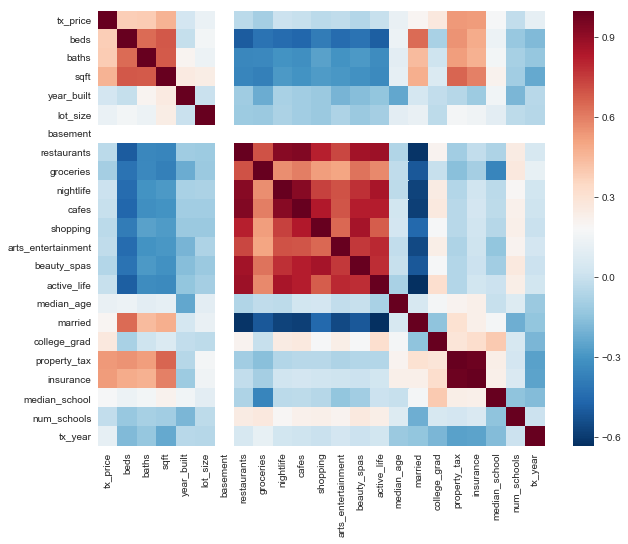&#10;">

See how the cells for <code style="color:steelblue">'basement'</code> are now white? That's what we want because they were not able to be calculated.

#### C.) Next, display the correlation values in each cell.
* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.
* To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
* Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.

<AxesSubplot:>

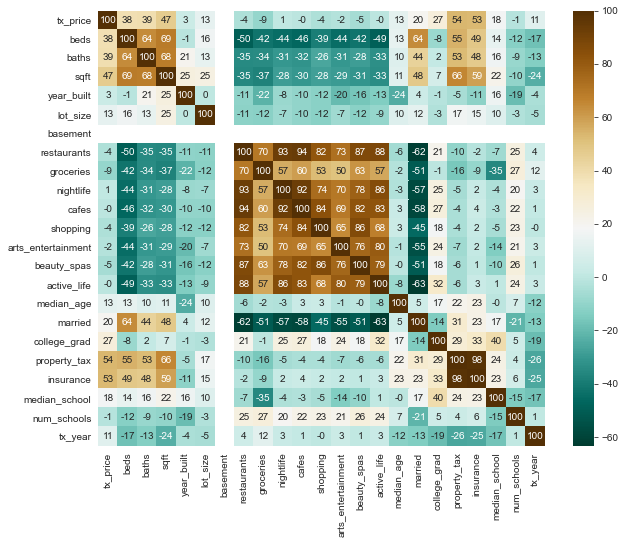

In [81]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(corrs*100, cmap= 'BrBG_r', annot=True, fmt='.0f')

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="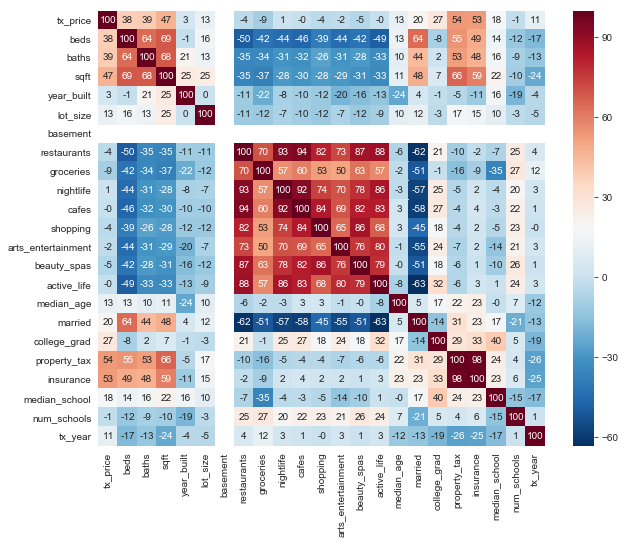&#10;">

So one thing to notice about the correlation matrix is that the upper triangle is an exact mirror of the lower triangle. This is because all of the features appear on both the x-axis AND the y-axis. In other words, the grid will show both the **correlation between "A and B"** as well the **correlation between "B and A"**.

However, the **correlation between "A and B"** is exactly the same as the **correlation between "B and A"**! Here's what we mean:

#### D.) Print the correlation between *beds* and *baths* and between *baths* and *beds*.
* **Tip:** All you need to do is call the <code>.corr()</code> method on a subset of <code>df</code> with only the *beds* and *baths* features.

In [82]:
df[['beds', 'baths']].corr()

,beds,baths
beds,1.000000,0.644572
baths,0.644572,1.000000


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>beds</th>
      <th>baths</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>beds</th>
      <td>1.000000</td>
      <td>0.644572</td>
    </tr>
    <tr>
      <th>baths</th>
      <td>0.644572</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

Because the top triangle of the correlation matrix is **redundant** with the lower triangle, we can choose to hide it if we want to reduce the amount of visual clutter. Here's how:

#### E.) Generate a boolean mask for the top triangle.
* The mask should have the same shape (i.e. dimensions) as the correlation matrix.
* The values in the upper triangle should be True/1 while those in the lower triangle should be False/0.
* Either a mask of 0's and 1's OR a mask of False's and True's will work.
* **Tip:** <code>np.zeros_like()</code> returns an array of zeros with the same shape as a given array.
* **Tip:** <code>np.triu_indices_from()</code> returns the indices for the upper triangle of an array.
* **Tip:** Remember that NumPy arrays are mutable, which means that you can "overwrite" the values in any array by selecting those values by their indices.
* **Tip:** Feel free to insert more code cells and play around with this a bit. This is meant to be a trickier exercise, so check the answer key if the solution still eludes you after several minutes of trial-and-error.

In [83]:
# Generate a mask for the upper triangle
corrs.shape

(23, 23)

In [109]:
# Create zeros matrixs
corrs_mask = np.zeros_like(corrs)

# Grab index of the upper triangle 
upper = np.triu_indices_from(corrs_mask) # This returns two arrays of indexs, one for row index and one for column index

# Replace upper triangle with 1
i = 0
while i <= len(upper[0])-1:
    corrs_mask[upper[0][i], upper[1][i]] = 1
    i+= 1


#### F.) Just to be clear on what we've created, let's visualize that triangular mask and see what's going on under the hood.
* You can use Seaborn heatmaps for more than just correlation plots. Plot a seaborn heatmap of the mask.
* Do you see how there are only two values, True (1) and False (0)? Notice how the values in the upper triangle are all True/1 and the ones in the lower triangle are all False/1.
* **Tip:** For this heatmap, we're just using the default color map.

<AxesSubplot:>

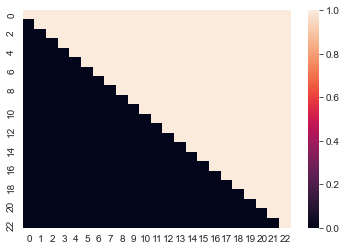

In [110]:
sns.heatmap(corrs_mask)

After creating a triangular mask like the one above, we can pass it into the <code style="color:steelblue">sns.heatmap()</code> function to hide certain cells (i.e. all of the True values in the mask).

#### G.) Plot the correlation heatmap again, this time using that mask.
* **Tip:** <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes you've made up to now.

<AxesSubplot:>

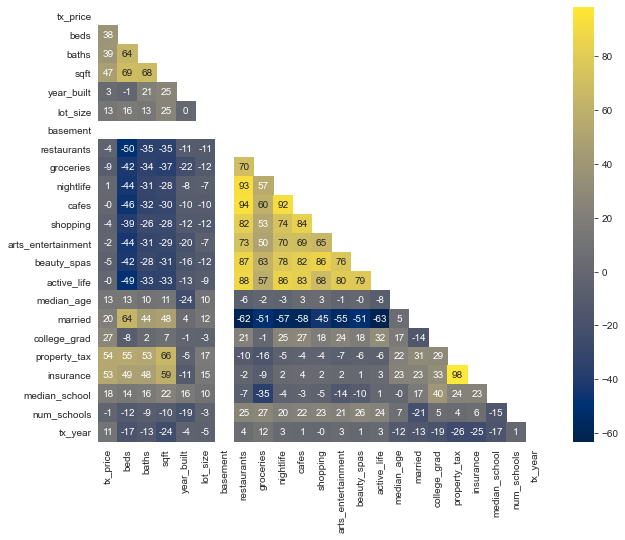

In [137]:
corrs = df.corr()
plt.figure(figsize= (10, 8))
sns.heatmap(corrs*100, mask= corrs_mask,  cmap= 'cividis', annot= True, fmt='.0f' )

#### H.) Finally, remove the colorbar on the side.
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Keep all of the other styling changes you've made up to now.
* But change the figure size to 9 x 8 (since we're removing the sidebar, this will help us keep nice proportions)

<AxesSubplot:>

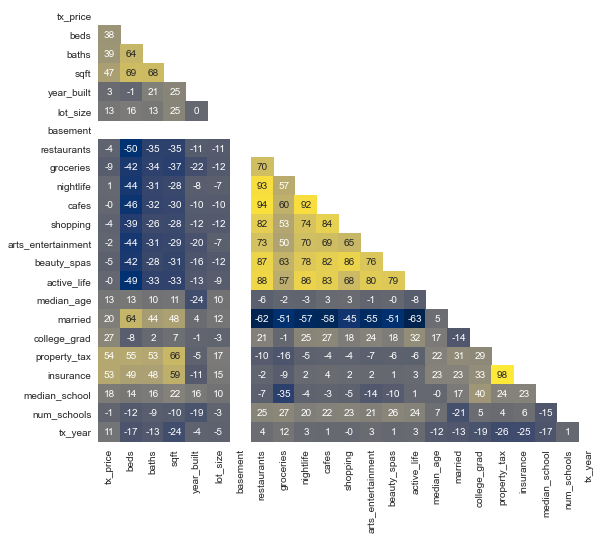

In [144]:
# Make the figsize 9 x 8
plt.figure(figsize= (9, 8))

# Plot heatmap of correlations
sns.heatmap(corrs*100, mask= corrs_mask, cmap= 'cividis', annot= True, fmt='.0f', cbar= False)


Before powering on to the next module, we recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.

As a reminder, here are a few things you did in this module:
* You explored basic information about your dataset.
* You plotted distributions of numeric and categorical features.
* You segmented your dataset by <code style="color:steelblue">'property_type'</code>.
* And you visualized a heatmap of feature correlations.

As you work through the next module, Data Cleaning, we recommend keeping this workbook open in a separate tab. It might be helpful to have your charts in front of you as you clean the data.

<AxesSubplot:>

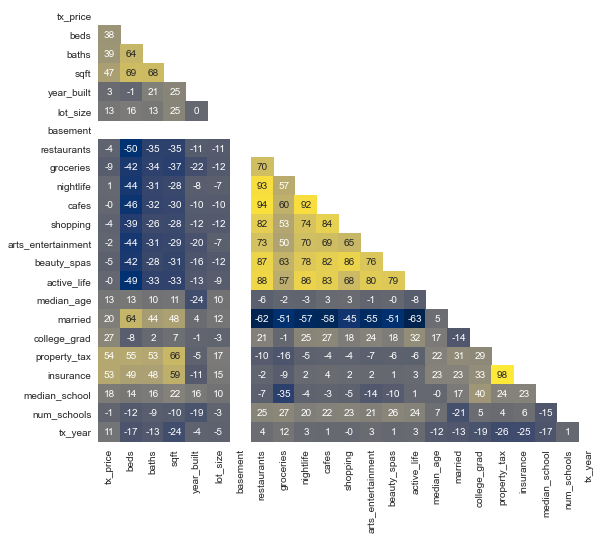

In [146]:
# Create the heatmap again from scrach 

# corr matrix 
corrs = df.corr()

# mask matrix
corr_mask = np.zeros_like(corrs)
upper = np.triu_indices_from(corr_mask)
i= 0
while i <= len(upper[0])-1:
    corr_mask[upper[0][i], upper[1][i]] = 1
    i+= 1

# plot the heat map
plt.figure(figsize=(9,8))
sns.heatmap(corrs*100, mask= corrs_mask, cmap= 'cividis', annot=True, fmt= '.0f', cbar=False)